# Principal Component Analysis for dimensionality reduction

# Load libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset and remove non-numerical data

In [28]:
# Load data
data = pd.read_csv(r"C:\Users\Admin\IT1244-Stock-Market\train_data.csv")

# Convert 'Date' to datetime, handling errors
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Check for NaT values after conversion
if data['Date'].isnull().any():
    print("There are unparseable dates:")
    print(data[data['Date'].isnull()])

# Select features for PCA
X = data.drop('Close', axis=1)  # Replace 'target_column' with your actual target column name
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day
X = X.drop('Date', axis=1)

X=  X.drop('Symbol', axis=1)
X = X.drop('GICS Sector', axis=1)
X = X.drop('Headquarters Location', axis=1)
X = X.drop('Founded', axis=1)
X = X.drop('Close_lag_1', axis=1)
X = X.drop('Close_lag_2', axis=1)
X = X.drop('Close_lag_3', axis=1)
X = X.drop('Close_lag_4', axis=1)
X = X.drop('Close_lag_5', axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_52908\2270637424.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\Admin\IT1244-Stock-Market\train_data.csv")


# Because PCA uses distance metric, need to standardise

In [36]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)
X_imputed_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_imputed_df)

[[-0.32023925  0.30704217  1.71009421 ...  0.42707083 -0.00679865
  -1.97019958]
 [-0.38190595 -0.15326762 -0.24267159 ...  0.70875337  0.7099958
  -1.97019958]
 [-0.38300679 -0.15326762 -0.24267159 ...  0.70875337  1.42679024
  -1.97019958]
 ...
 [-0.36101884 -0.15326762 -0.24267159 ...  1.27211846 -0.00679865
   0.50756279]
 [-0.36882133 -0.15326762 -0.24267159 ...  1.27211846  0.7099958
   0.50756279]
 [-0.34812735 -0.15326762 -0.24267159 ...  1.27211846  1.42679024
   0.50756279]]
          Volume  News - Positive Sentiment  News - Negative Sentiment  \
0      -0.320239                   0.307042                   1.710094   
1      -0.381906                  -0.153268                  -0.242672   
2      -0.383007                  -0.153268                  -0.242672   
3      -0.374152                  -0.120388                  -0.242672   
4      -0.347683                  -0.153268                  -0.242672   
...          ...                        ...                       

# Create PCA

In [43]:
# Create PCA object
pca = PCA(n_components=10)  # Choose the number of components you want to keep
X_cleaned = X_imputed_df.dropna()

# Fit PCA on the scaled data
X_pca = pca.fit_transform(X_cleaned)

In [44]:
# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

# Add original feature names for later use
pca_components = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

In [45]:
# Get the PCA components
components = pca.components_

# Create a DataFrame to see the contributions
pca_components_df = pd.DataFrame(components, columns=X_cleaned.columns, index=[f'PC{i+1}' for i in range(len(components))])
print(pca_components_df)

        Volume  News - Positive Sentiment  News - Negative Sentiment  \
PC1   0.301683                   0.353142                   0.402751   
PC2   0.152443                   0.339416                   0.300189   
PC3  -0.001822                   0.002851                  -0.009323   
PC4  -0.132446                  -0.074602                   0.113817   
PC5   0.114884                  -0.100387                  -0.052142   
PC6   0.153764                  -0.184990                  -0.118198   
PC7  -0.013653                  -0.013249                   0.002808   
PC8  -0.045340                  -0.013441                   0.007076   
PC9   0.037217                  -0.074642                  -0.062256   
PC10  0.010688                   0.016473                   0.095065   

      News - New Products  News - Layoffs  News - Analyst Comments  \
PC1              0.301212        0.086592                 0.320566   
PC2              0.293117        0.032230                -0.553967 

In [46]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by component: {explained_variance}")

Explained variance by component: [0.16596273 0.10145861 0.07911334 0.05989731 0.05668949 0.05349687
 0.0531669  0.05246855 0.0513211  0.04886626]


# Plot Scree plot to see what is the optimal number of PCA, turns out 5 or 6

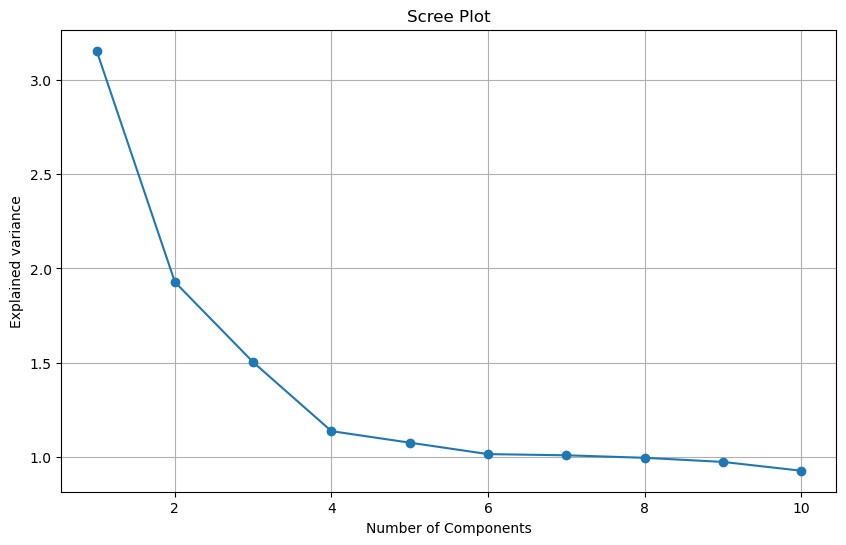

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_) + 1), 
         pca.explained_variance_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained variance')
plt.title('Scree Plot')
plt.grid()
plt.show()

# Create biplot to see how does the PCA 1 and PCA 2 loads which variables heavily (explains variance the most)

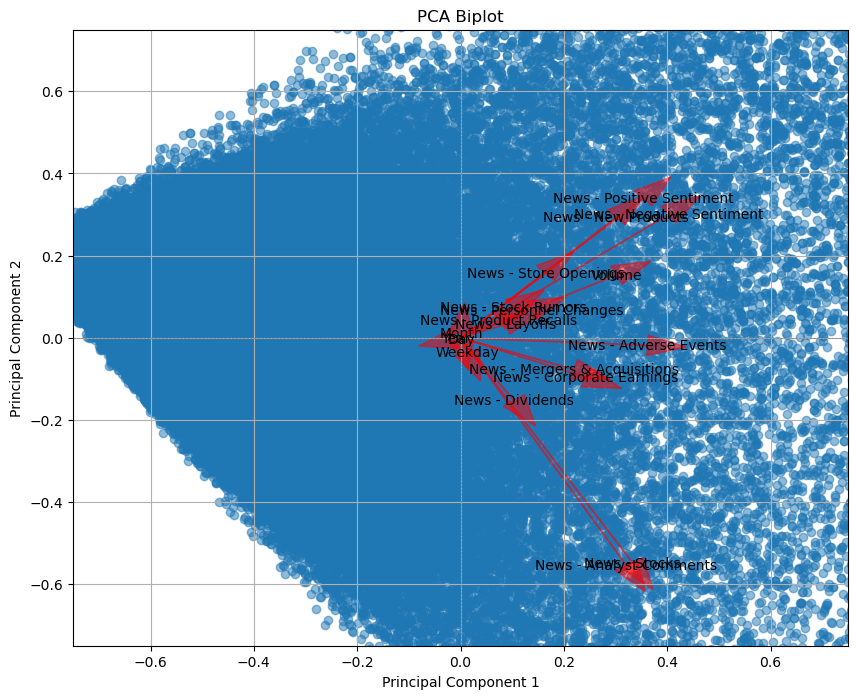

In [56]:
# Create the biplot
plt.figure(figsize=(10, 8))

# Scatter plot of PCA results
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)

# Adding variable vectors
for i, col in enumerate(pca_components.columns):
    plt.arrow(0, 0, pca_components.loc['PC1', col], pca_components.loc['PC2', col],
              color='r', alpha=0.5, head_width=0.05)
    plt.text(pca_components.loc['PC1', col], pca_components.loc['PC2', col], 
             col, color='black', ha='center', va='center')

# Set labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Biplot')
plt.grid()

plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axvline(0, color='grey', lw=0.5, ls='--')

plt.xlim(-0.75, 0.75)  # Adjust based on your data
plt.ylim(-0.75, 0.75)  # Adjust based on your data

plt.show()


# PC1 loads heavily on News- Positive Sentiment, News-Negative Sentiment, News- New Products
# PC2 loads heavily on News- Analyst comments, News- Stocks

In [59]:
# almost the same as xgboost, just that Volume and Year (high on xgboost) are not here